<h1 id="Contents">Contents<a href="#Contents"></a></h1>
        <ol>
        <li><a class="" href="#Logistic-Regression-in-Scikit-Learn">Logistic Regression in Scikit-Learn</a></li>
<ol><li><a class="" href="#Logistic-Function">Logistic Function</a></li>
<li><a class="" href="#LogisticRegression-Class">LogisticRegression Class</a></li>
<li><a class="" href="#Solvers">Solvers</a></li>
<li><a class="" href="#Parameters">Parameters</a></li>
<li><a class="" href="#Attributes">Attributes</a></li>
</ol>

# Logistic Regression in Scikit-Learn

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

## Logistic Function

Logistic function is defined as:
$$
f(x) = \frac{1}{1+e^{-x}}
$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcdefaults()

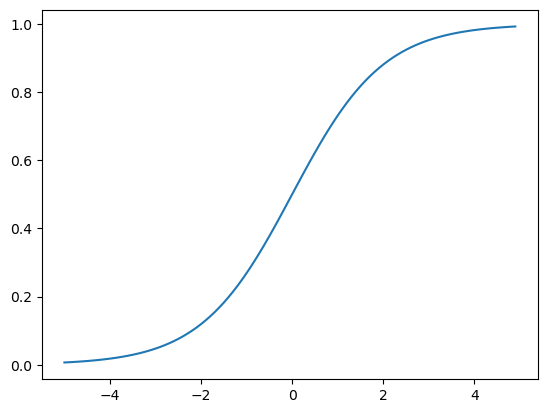

In [4]:
x = np.arange(-5, 5, 0.1)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)
plt.show()

## `LogisticRegression` Class

Logistic regression is implemented in `LogisticRegression`. This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional $l_1, l_2$ or Elastic-Net regularization.

As an optimization problem, binary class $l_2$ penalized logistic regression minimizes the following cost function:
$$
\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) .
$$
Similarly, for $l_1$ regularization, the cost function is:
$$
\min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1).
$$
while the elastic net equivalent is:
$$
\min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1),
$$


> Note that, in this notation, it’s assumed that the target $y_i$ takes values in the set $\{-1, 1\}$ at trial $i$.

## Solvers

The solvers implemented in the class LogisticRegression are “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”:

The solver “liblinear” uses a coordinate descent (CD) algorithm, and relies on the C++ LIBLINEAR library, which is shipped with scikit-learn. However, the CD algorithm implemented in liblinear cannot learn a true multinomial (multiclass) model; instead, the optimization problem is decomposed in a “one-vs-rest” fashion so separate binary classifiers are trained for all classes. This happens under the hood, so LogisticRegression instances using this solver behave as multiclass classifiers. 

The “lbfgs”, “sag” and “newton-cg” solvers only support $l_1$ regularization or no regularization, and are found to converge faster for some high-dimensional data. Setting multi_class to “multinomial” with these solvers learns a true multinomial logistic regression model, which means that its probability estimates should be better calibrated than the default “one-vs-rest” setting.

The “sag” solver uses Stochastic Average Gradient descent. It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.

The “saga” solver is a variant of “sag” that also supports the non-smooth `penalty="l1"`. This is therefore the solver of choice for sparse multinomial logistic regression. It is also the only solver that supports `penalty="elasticnet"`.

The “lbfgs” is an optimization algorithm that approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm, which belongs to quasi-Newton methods. The “lbfgs” solver is recommended for use for small data-sets but for larger datasets its performance suffers.

The following table summarizes the penalties supported by each solver:
<table class="docutils align-default">
<colgroup>
<col style="width: 30%">
<col style="width: 17%">
<col style="width: 13%">
<col style="width: 17%">
<col style="width: 11%">
<col style="width: 12%">
</colgroup>
<tbody>
<tr class="row-odd"><td></td>
<td colspan="5"><p><strong>Solvers</strong></p></td>
</tr>
<tr class="row-even"><td><p><strong>Penalties</strong></p></td>
<td><p><strong>‘liblinear’</strong></p></td>
<td><p><strong>‘lbfgs’</strong></p></td>
<td><p><strong>‘newton-cg’</strong></p></td>
<td><p><strong>‘sag’</strong></p></td>
<td><p><strong>‘saga’</strong></p></td>
</tr>
<tr class="row-odd"><td><p>Multinomial + L2 penalty</p></td>
<td><p>no</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
</tr>
<tr class="row-even"><td><p>OVR + L2 penalty</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
</tr>
<tr class="row-odd"><td><p>Multinomial + L1 penalty</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
<td><p>yes</p></td>
</tr>
<tr class="row-even"><td><p>OVR + L1 penalty</p></td>
<td><p>yes</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
<td><p>yes</p></td>
</tr>
<tr class="row-odd"><td><p>Elastic-Net</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
<td><p>yes</p></td>
</tr>
<tr class="row-even"><td><p>No penalty (‘none’)</p></td>
<td><p>no</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
</tr>
<tr class="row-odd"><td><p><strong>Behaviors</strong></p></td>
<td colspan="5"></td>
</tr>
<tr class="row-even"><td><p>Penalize the intercept (bad)</p></td>
<td><p>yes</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
</tr>
<tr class="row-odd"><td><p>Faster for large datasets</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
</tr>
<tr class="row-even"><td><p>Robust to unscaled datasets</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
<td><p>yes</p></td>
<td><p>no</p></td>
<td><p>no</p></td>
</tr>
</tbody>
</table>

For more informations, see the [paper](https://arxiv.org/abs/1407.0202).

For comparision of performance of different solvers, see the [article](http://www.fuzihao.org/blog/2016/01/16/Comparison-of-Gradient-Descent-Stochastic-Gradient-Descent-and-L-BFGS/). 

## Parameters

Here are some of the parameters taken by the `LogisticRegression` class:
* **penalty**: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’

    Specify the norm of the penalty:

    * 'none': no penalty is added;

    * 'l2': add a L2 penalty term and it is the default choice;

    * 'l1': add a L1 penalty term;

    * 'elasticnet': both L1 and L2 penalty terms are added.
* **tol**: float, default=1e-4
  
    Tolerance for stopping criteria.
* **C**: float, default=1.0
  
    Inverse of regularization strength; must be positive. Regularization is applied when C is greater than 0.
* **fit_intercept**: bool, default=True
  
    Whether to calculate the intercept for this model. If set to false, no intercept will be used in calculations (i.e. data is expected to be centered).
* **intercept_scaling**: float, default=1.0
  
    When self.fit_intercept is True, instance vector y becomes y = intercept_scaling * y + intercept. Must be positive.
* **class_weight**: {dict, ‘balanced’}, default=None
  
    Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
    The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
* **solver**: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
  
    Algorithm to use in the optimization problem.   
* **max_iter**: int, default=100

    Maximum number of iterations for the solver.    
* **multi_class**: {‘ovr’, ‘multinomial’}, default=’ovr’
  
    If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.
* **warm_start**: bool, default=False
  
    When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.
* **l1_ratio**: float, default=None
  
    The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.

The choice of the algorithm depends on the penalty chosen: Supported penalties by solver:
* ‘newton-cg’ - [‘l2’, ‘none’]
* ‘lbfgs’ - [‘l2’, ‘none’]

* ‘liblinear’ - [‘l1’, ‘l2’]

* ‘sag’ - [‘l2’, ‘none’]

* ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

## Attributes

The class has the following attributes:
* **classes_**: array of shape (n_classes,)
  
    A list of class labels known to the classifier.
* **coef_**: array, shape (1, n_features) or (n_classes, n_features)
  
    Coefficient of the features in the decision function.

    `coef_` is of shape (1, n_features) when the given problem is binary. In particular, when `multi_class='multinomial'`, `coef_` corresponds to outcome 1 (True) and -`coef_` corresponds to outcome 0 (False).
* **intercept_**: array, shape (1,) or (n_classes,)
  
    Intercept (a.k.a. bias) added to the decision function.

    If `fit_intercept` is set to False, the intercept is set to zero. `intercept_` is of shape (1,) when the given problem is binary. In particular, when `multi_class='multinomial'`, `intercept_` corresponds to outcome 1 (True) and -`intercept_` corresponds to outcome 0 (False).